In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
swe_data = pd.read_csv('/content/drive/MyDrive/SWE Project Data Stuff/snotel_2013_2024.csv')

In [ ]:
swe_data.head()

,station_name,date,lat,lon,swe_value,change_in_swe_inch,snow_depth,air_temperature_observed_f
0,Adams Ranch #1,2013-01-03,34.25,-105.41667,NaN,NaN,NaN,4.1
1,Adams Ranch #1,2013-01-04,34.25,-105.41667,NaN,NaN,NaN,18.1
2,Adams Ranch #1,2013-01-05,34.25,-105.41667,NaN,NaN,NaN,20.5
3,Adams Ranch #1,2013-01-06,34.25,-105.41667,NaN,NaN,NaN,14.0
4,Adams Ranch #1,2013-01-07,34.25,-105.41667,NaN,NaN,NaN,21.2


In [ ]:
state_boundaries = {
    'Alabama': {'lat_min': 30.1, 'lat_max': 35.0, 'lon_min': -88.5, 'lon_max': -84.9},
    'Alaska': {'lat_min': 51.2, 'lat_max': 71.5, 'lon_min': -179.1, 'lon_max': -129.9},
    'Arizona': {'lat_min': 31.3, 'lat_max': 37.0, 'lon_min': -114.8, 'lon_max': -109.0},
    'Arkansas': {'lat_min': 33.0, 'lat_max': 36.5, 'lon_min': -94.6, 'lon_max': -89.6},
    'California': {'lat_min': 32.5, 'lat_max': 42.0, 'lon_min': -124.4, 'lon_max': -114.1},
    'Colorado': {'lat_min': 36.9, 'lat_max': 41.0, 'lon_min': -109.1, 'lon_max': -102.0},
    'Connecticut': {'lat_min': 40.9, 'lat_max': 42.1, 'lon_min': -73.7, 'lon_max': -71.8},
    'Delaware': {'lat_min': 38.4, 'lat_max': 39.8, 'lon_min': -75.8, 'lon_max': -75.0},
    'Florida': {'lat_min': 24.4, 'lat_max': 31.0, 'lon_min': -87.6, 'lon_max': -79.9},
    'Georgia': {'lat_min': 30.4, 'lat_max': 35.0, 'lon_min': -85.6, 'lon_max': -80.8},
    'Hawaii': {'lat_min': 18.9, 'lat_max': 28.6, 'lon_min': -178.4, 'lon_max': -154.8},
    'Idaho': {'lat_min': 42.0, 'lat_max': 49.0, 'lon_min': -117.2, 'lon_max': -111.0},
    'Illinois': {'lat_min': 36.9, 'lat_max': 42.5, 'lon_min': -91.5, 'lon_max': -87.5},
    'Indiana': {'lat_min': 37.8, 'lat_max': 41.8, 'lon_min': -88.1, 'lon_max': -84.8},
    'Iowa': {'lat_min': 40.3, 'lat_max': 43.5, 'lon_min': -96.6, 'lon_max': -90.1},
    'Kansas': {'lat_min': 36.9, 'lat_max': 40.1, 'lon_min': -102.1, 'lon_max': -94.6},
    'Kentucky': {'lat_min': 36.5, 'lat_max': 39.1, 'lon_min': -89.6, 'lon_max': -81.9},
    'Louisiana': {'lat_min': 28.9, 'lat_max': 33.0, 'lon_min': -94.0, 'lon_max': -88.8},
    'Maine': {'lat_min': 42.9, 'lat_max': 47.5, 'lon_min': -71.1, 'lon_max': -66.9},
    'Maryland': {'lat_min': 37.9, 'lat_max': 39.7, 'lon_min': -79.5, 'lon_max': -75.0},
    'Massachusetts': {'lat_min': 41.2, 'lat_max': 42.9, 'lon_min': -73.5, 'lon_max': -69.9},
    'Michigan': {'lat_min': 41.7, 'lat_max': 48.3, 'lon_min': -90.4, 'lon_max': -82.4},
    'Minnesota': {'lat_min': 43.5, 'lat_max': 49.4, 'lon_min': -97.2, 'lon_max': -89.5},
    'Mississippi': {'lat_min': 30.2, 'lat_max': 35.0, 'lon_min': -91.6, 'lon_max': -88.0},
    'Missouri': {'lat_min': 35.9, 'lat_max': 40.6, 'lon_min': -95.8, 'lon_max': -89.1},
    'Montana': {'lat_min': 44.4, 'lat_max': 49.0, 'lon_min': -116.1, 'lon_max': -104.0},
    'Nebraska': {'lat_min': 39.9, 'lat_max': 43.0, 'lon_min': -104.1, 'lon_max': -95.3},
    'Nevada': {'lat_min': 35.0, 'lat_max': 42.0, 'lon_min': -120.0, 'lon_max': -114.0},
    'New Hampshire': {'lat_min': 42.7, 'lat_max': 45.3, 'lon_min': -72.6, 'lon_max': -70.7},
    'New Jersey': {'lat_min': 38.9, 'lat_max': 41.4, 'lon_min': -75.6, 'lon_max': -73.9},
    'New Mexico': {'lat_min': 31.3, 'lat_max': 37.0, 'lon_min': -109.0, 'lon_max': -103.0},
    'New York': {'lat_min': 40.5, 'lat_max': 45.0, 'lon_min': -79.8, 'lon_max': -71.9},
    'North Carolina': {'lat_min': 33.8, 'lat_max': 36.6, 'lon_min': -84.3, 'lon_max': -75.5},
    'North Dakota': {'lat_min': 45.9, 'lat_max': 49.0, 'lon_min': -104.1, 'lon_max': -96.5},
    'Ohio': {'lat_min': 38.4, 'lat_max': 41.9, 'lon_min': -84.8, 'lon_max': -80.5},
    'Oklahoma': {'lat_min': 33.6, 'lat_max': 37.0, 'lon_min': -103.0, 'lon_max': -94.4},
    'Oregon': {'lat_min': 41.9, 'lat_max': 46.3, 'lon_min': -124.6, 'lon_max': -116.5},
    'Pennsylvania': {'lat_min': 39.7, 'lat_max': 42.3, 'lon_min': -80.5, 'lon_max': -74.7},
    'Rhode Island': {'lat_min': 41.1, 'lat_max': 42.0, 'lon_min': -71.9, 'lon_max': -71.1},
    'South Carolina': {'lat_min': 32.0, 'lat_max': 35.2, 'lon_min': -83.4, 'lon_max': -78.5},
    'South Dakota': {'lat_min': 42.5, 'lat_max': 45.9, 'lon_min': -104.1, 'lon_max': -96.4},
    'Tennessee': {'lat_min': 34.9, 'lat_max': 36.7, 'lon_min': -90.3, 'lon_max': -81.7},
    'Texas': {'lat_min': 25.8, 'lat_max': 36.5, 'lon_min': -106.6, 'lon_max': -93.5},
    'Utah': {'lat_min': 36.9, 'lat_max': 42.0, 'lon_min': -114.1, 'lon_max': -109.0},
    'Vermont': {'lat_min': 42.7, 'lat_max': 45.0, 'lon_min': -73.5, 'lon_max': -71.4},
    'Virginia': {'lat_min': 36.5, 'lat_max': 39.5, 'lon_min': -83.7, 'lon_max': -75.2},
    'Washington': {'lat_min': 45.5, 'lat_max': 49.0, 'lon_min': -124.9, 'lon_max': -116.9},
    'West Virginia': {'lat_min': 37.2, 'lat_max': 40.6, 'lon_min': -82.6, 'lon_max': -77.7},
    'Wisconsin': {'lat_min': 42.5, 'lat_max': 47.3, 'lon_min': -92.9, 'lon_max': -86.3},
    'Wyoming': {'lat_min': 40.9, 'lat_max': 45.0, 'lon_min': -111.0, 'lon_max': -104.0}
}


In [ ]:
def calculate_monthly_mean_swe(state_name, bounds):
    lat_min, lat_max = bounds['lat_min'], bounds['lat_max']
    lon_min, lon_max = bounds['lon_min'], bounds['lon_max']

    filtered_data = swe_data[
        (swe_data['lat'] >= lat_min) & (swe_data['lat'] <= lat_max) &
        (swe_data['lon'] >= lon_min) & (swe_data['lon'] <= lon_max)
    ]

    filtered_data['date'] = pd.to_datetime(filtered_data['date'])
    filtered_data['year'] = filtered_data['date'].dt.year
    filtered_data['month'] = filtered_data['date'].dt.month

    monthly_mean_swe = filtered_data.groupby(['year', 'month'])['swe_value'].mean().reset_index()
    monthly_mean_swe['state'] = state_name

    return monthly_mean_swe

<ipython-input-11-b823046c33c0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
<ipython-input-11-b823046c33c0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year'] = filtered_data['date'].dt.year
<ipython-input-11-b823046c33c0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

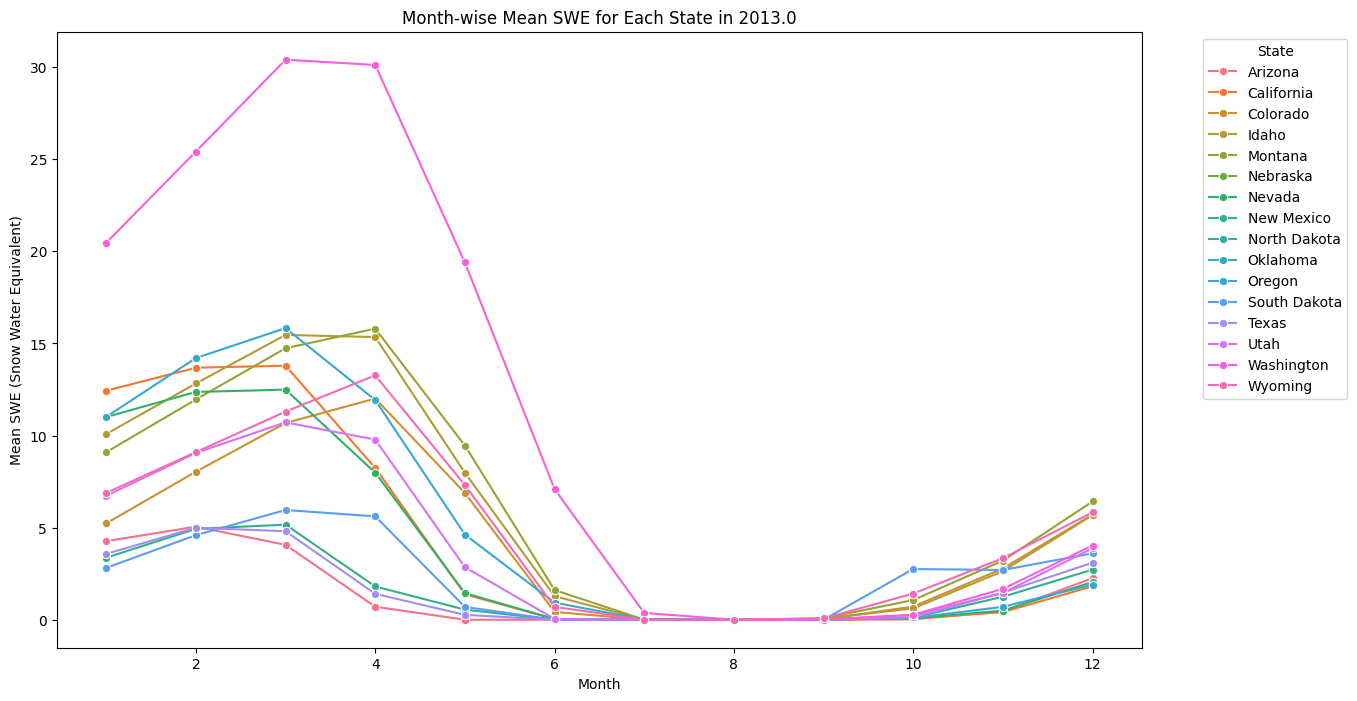

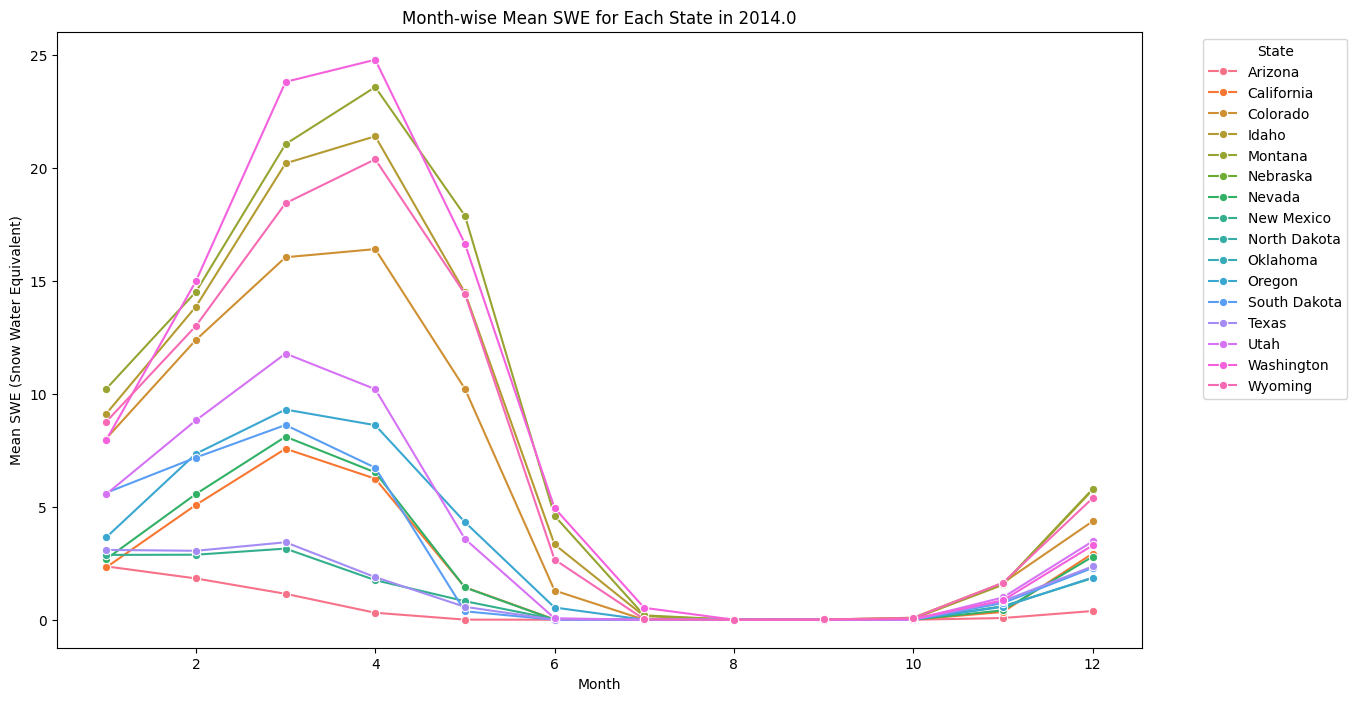

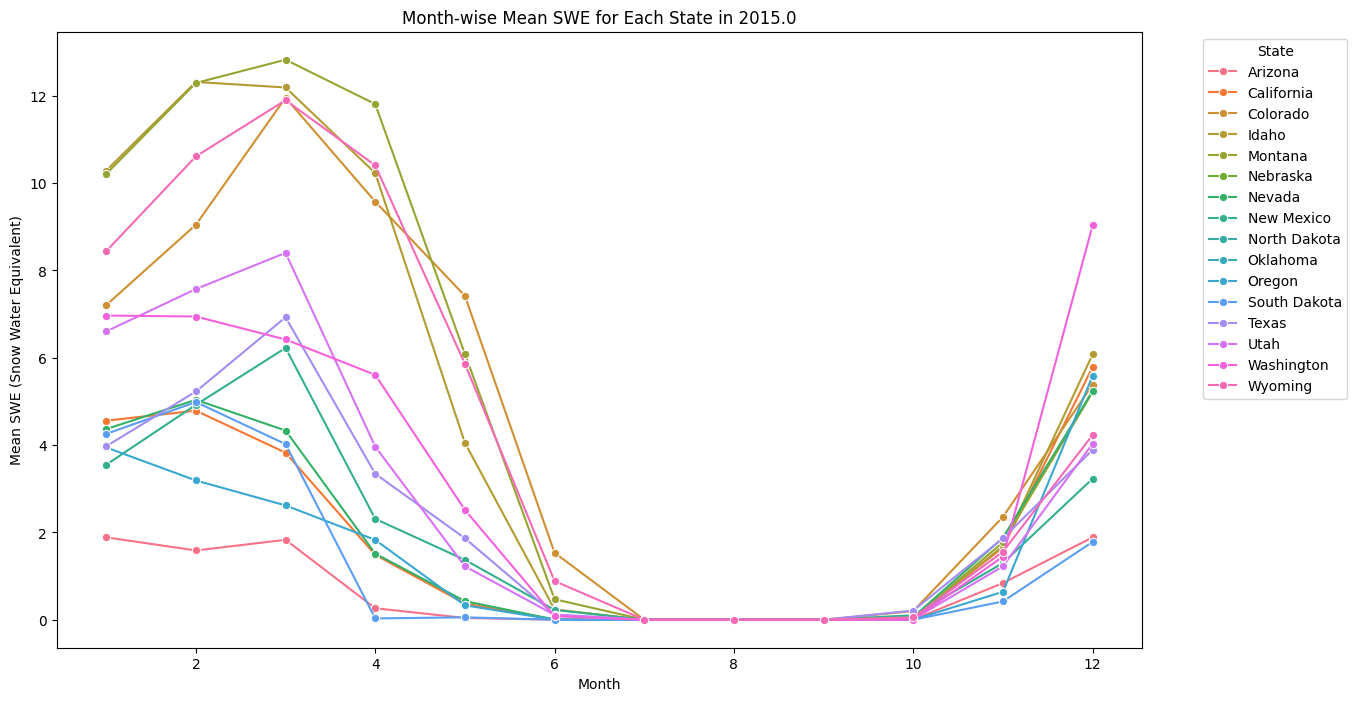

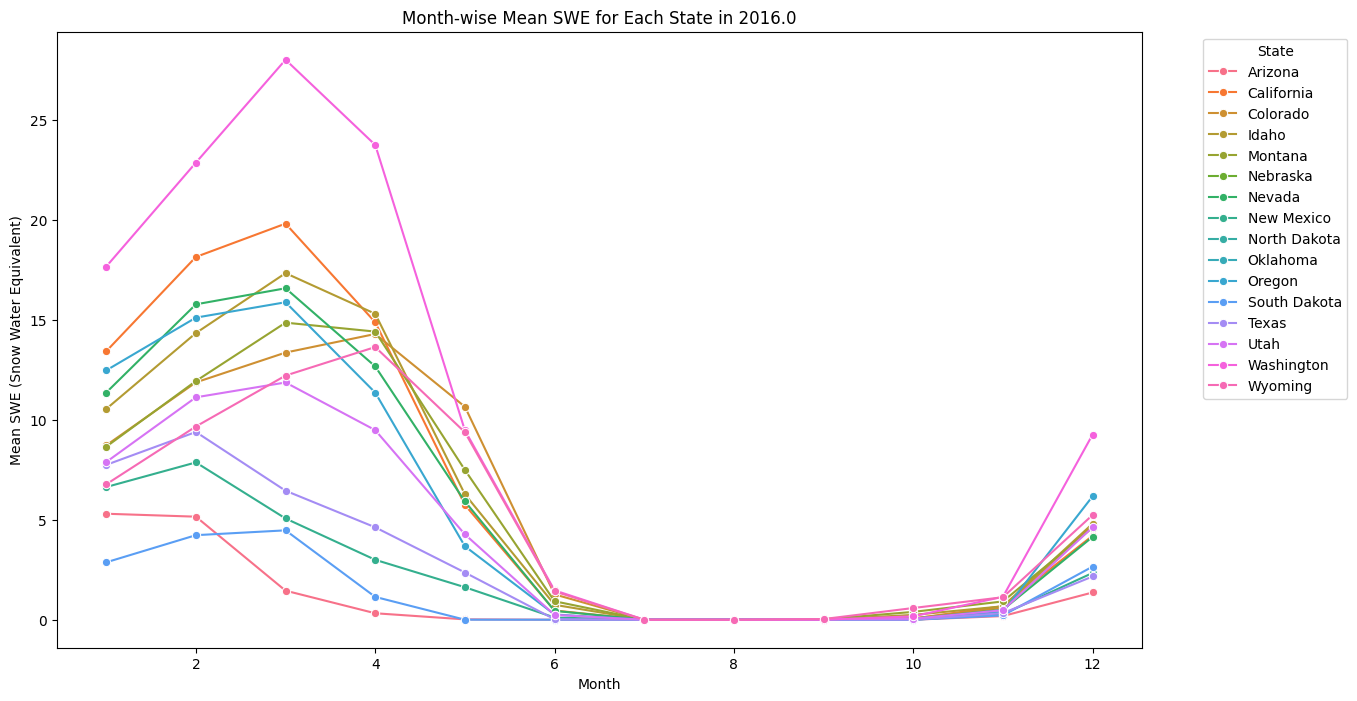

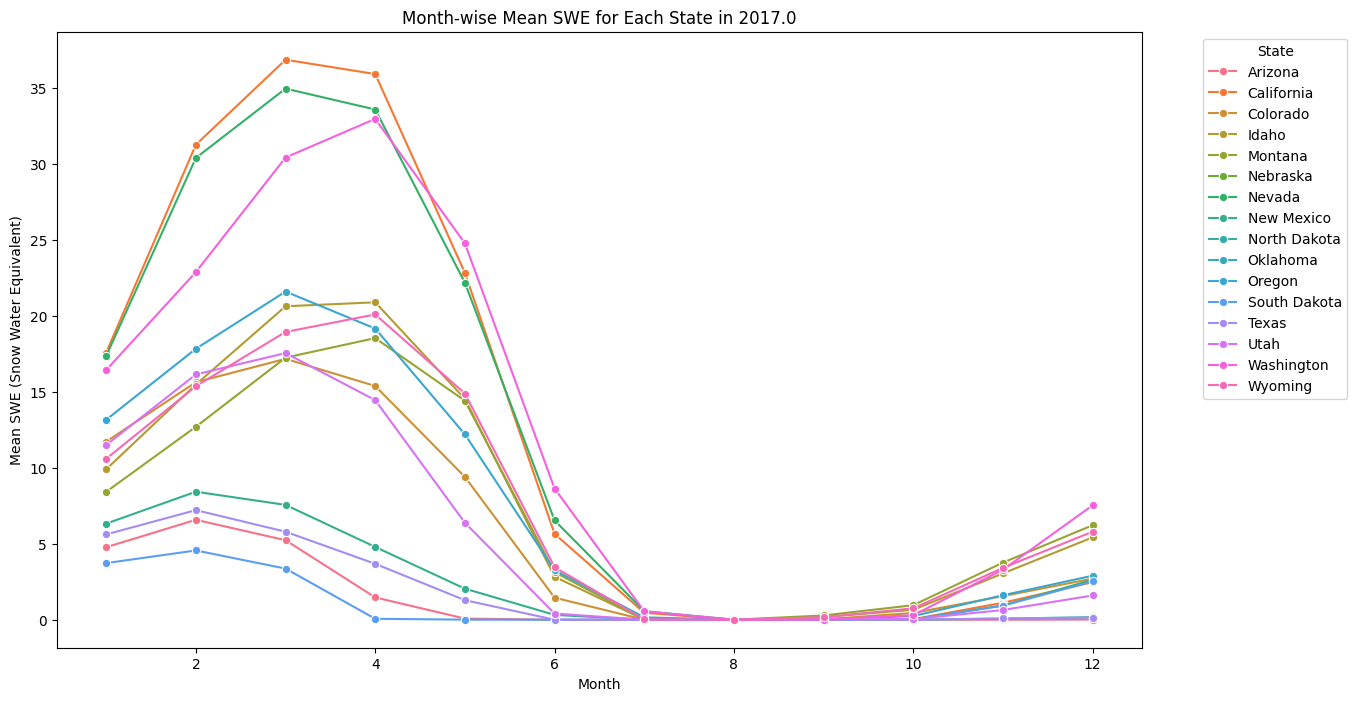

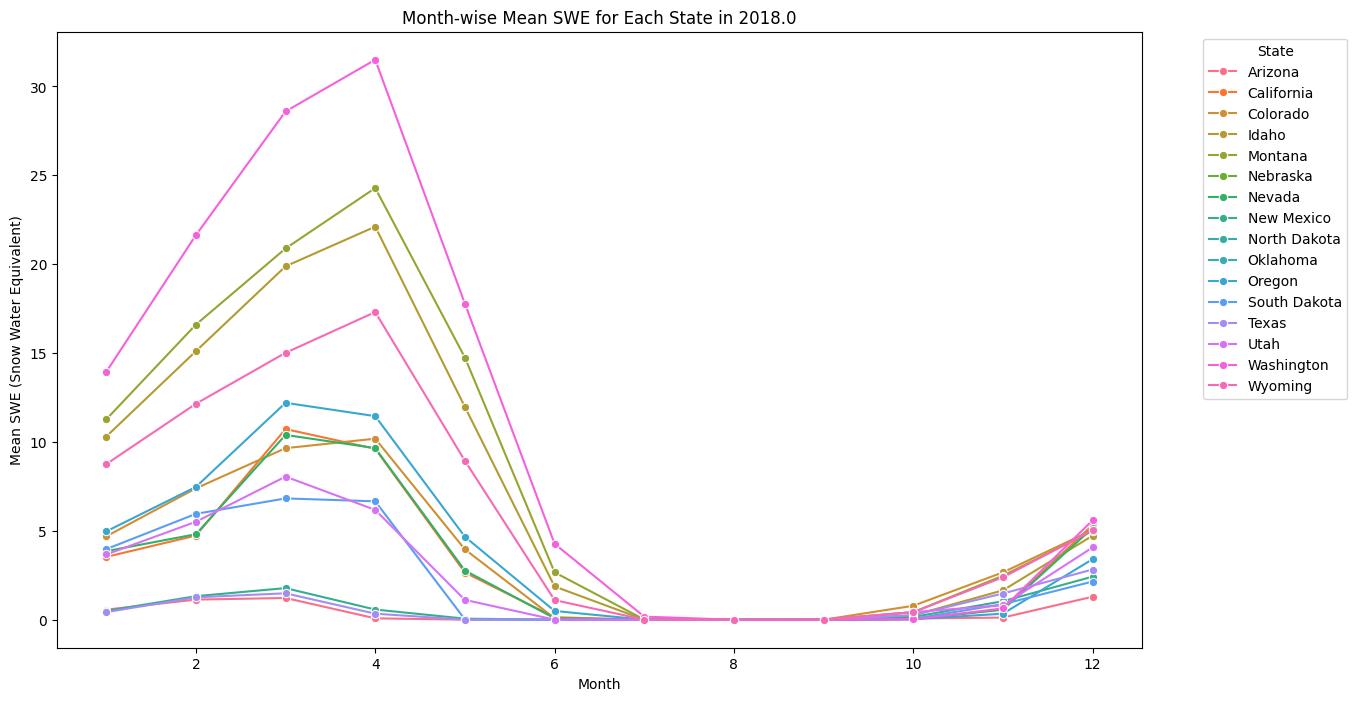

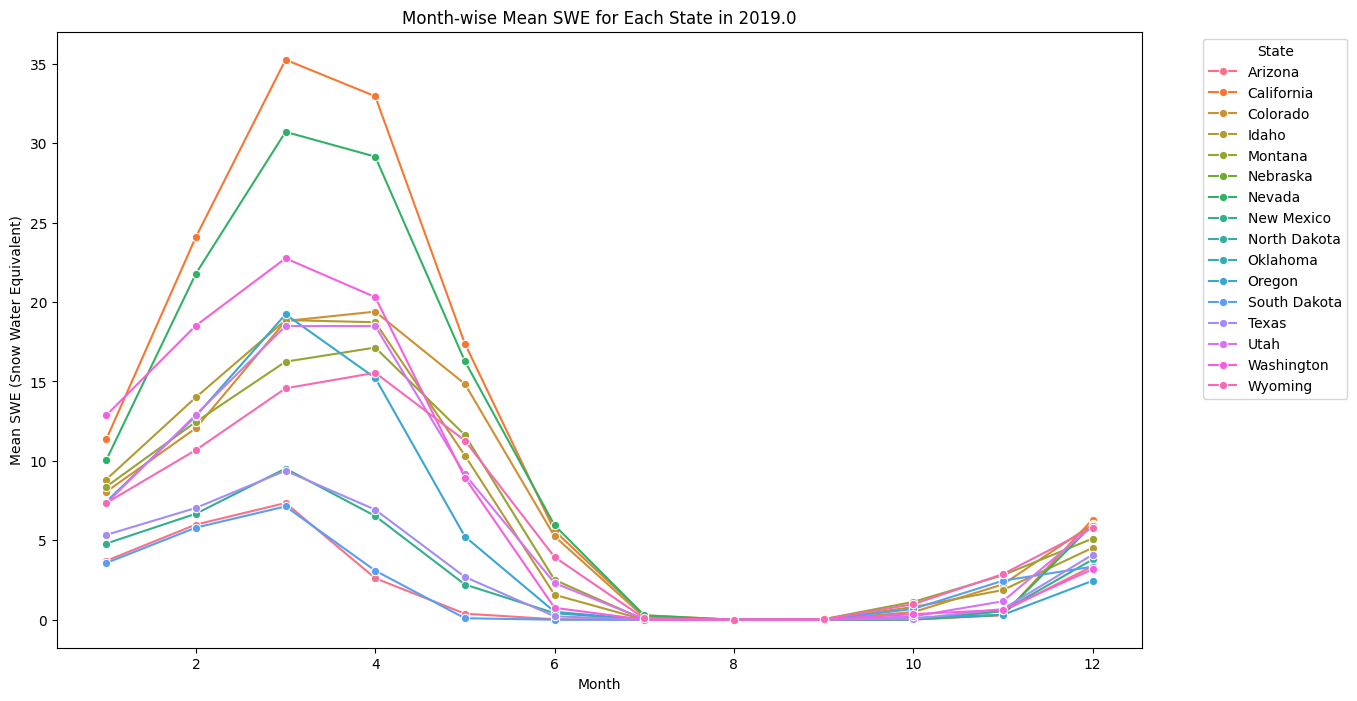

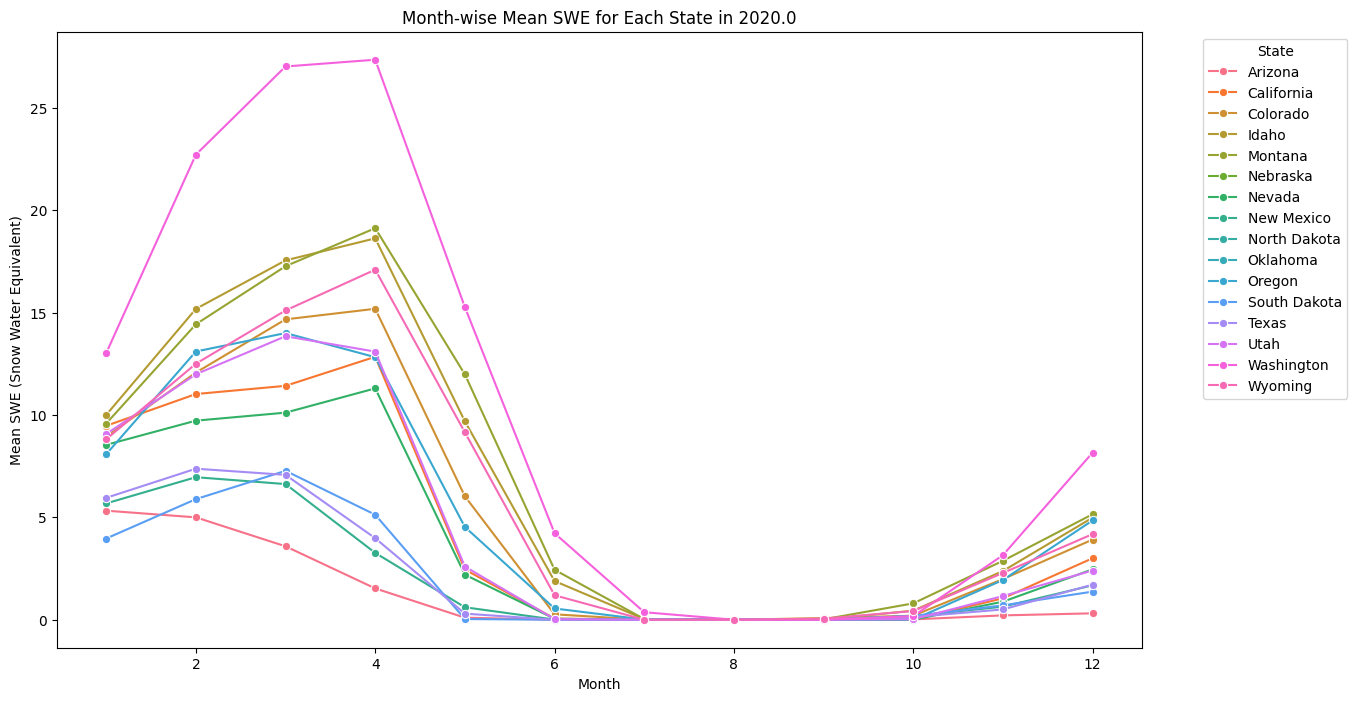

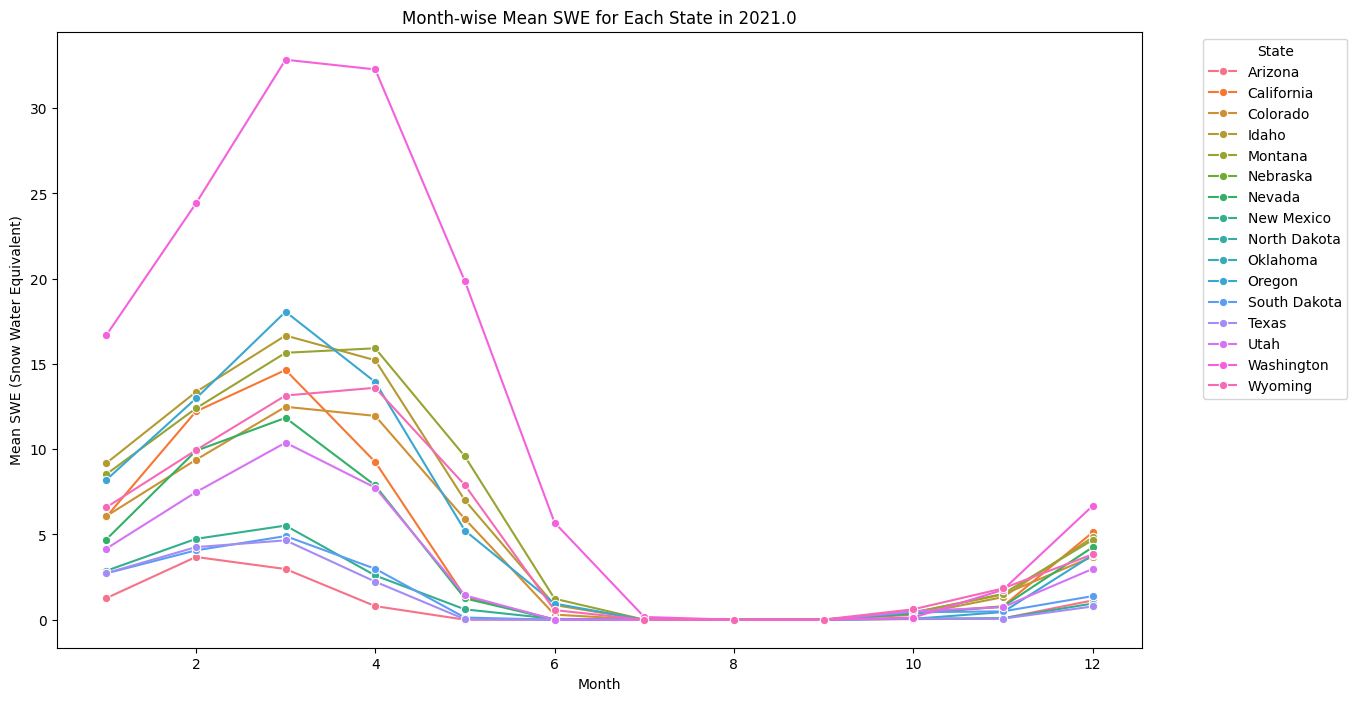

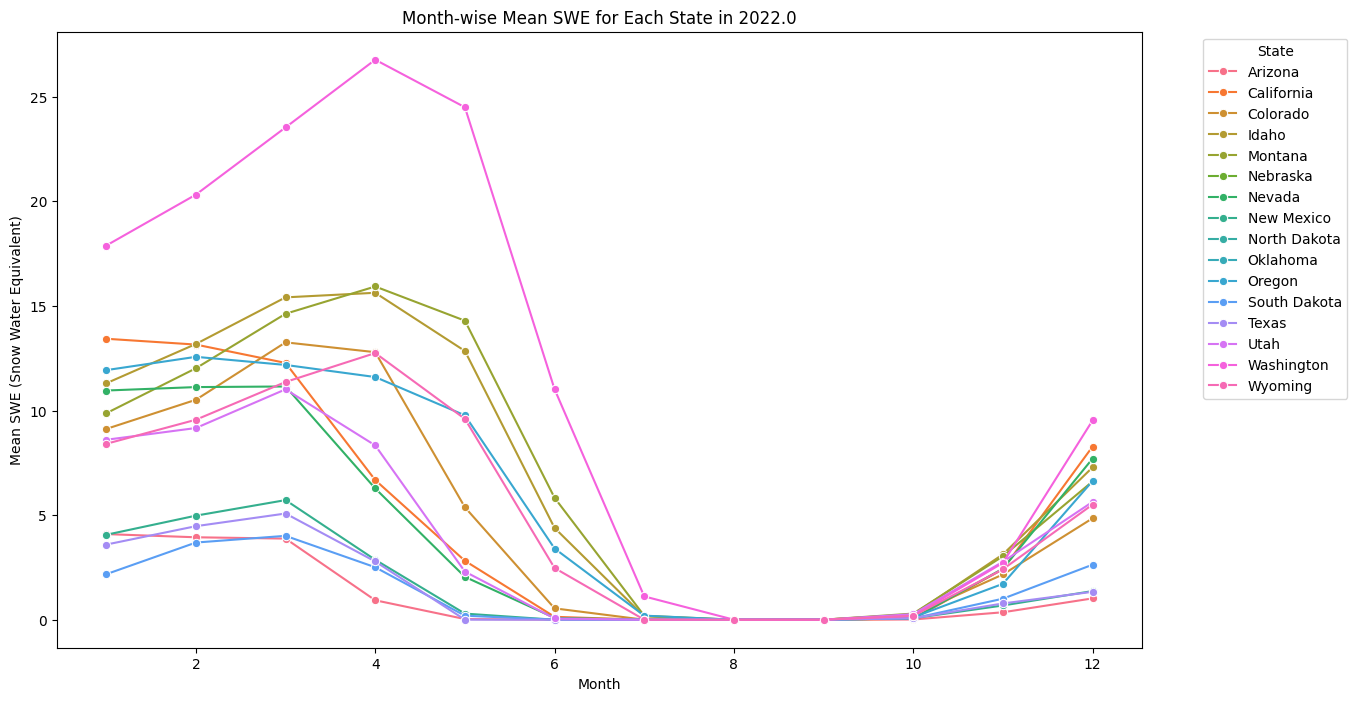

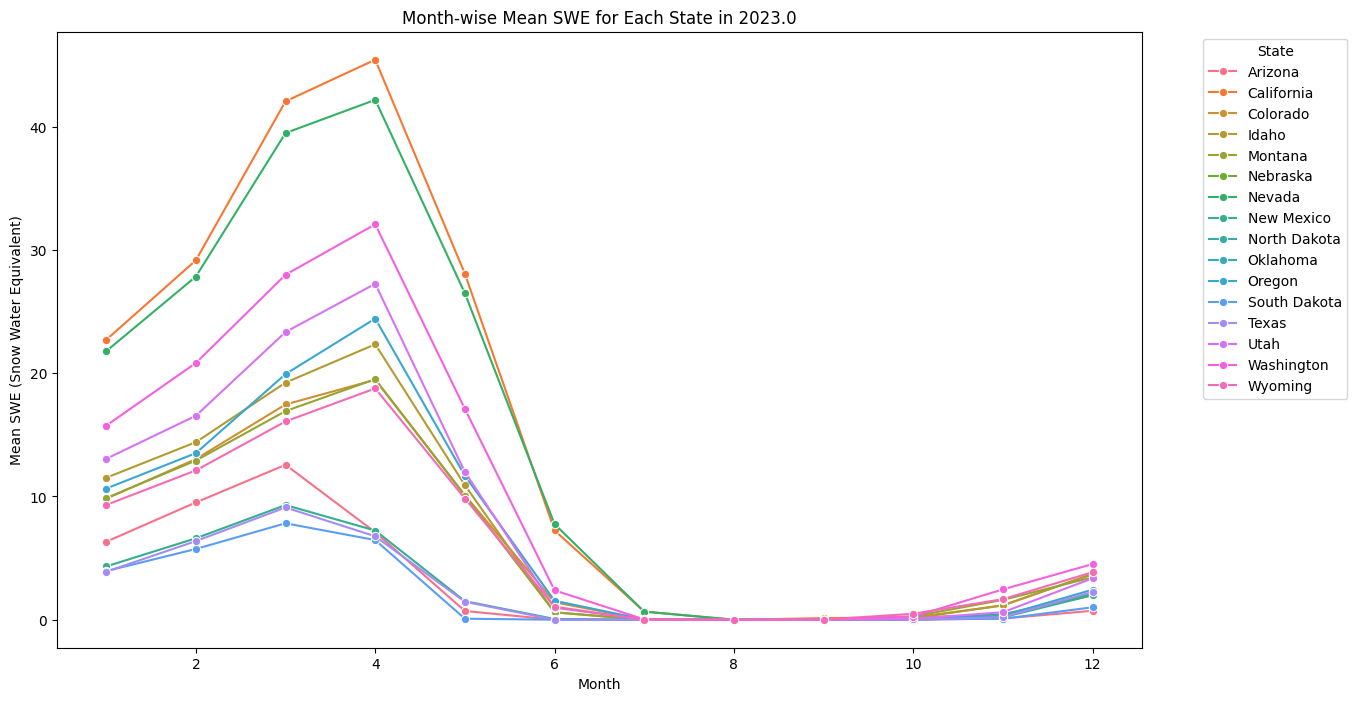

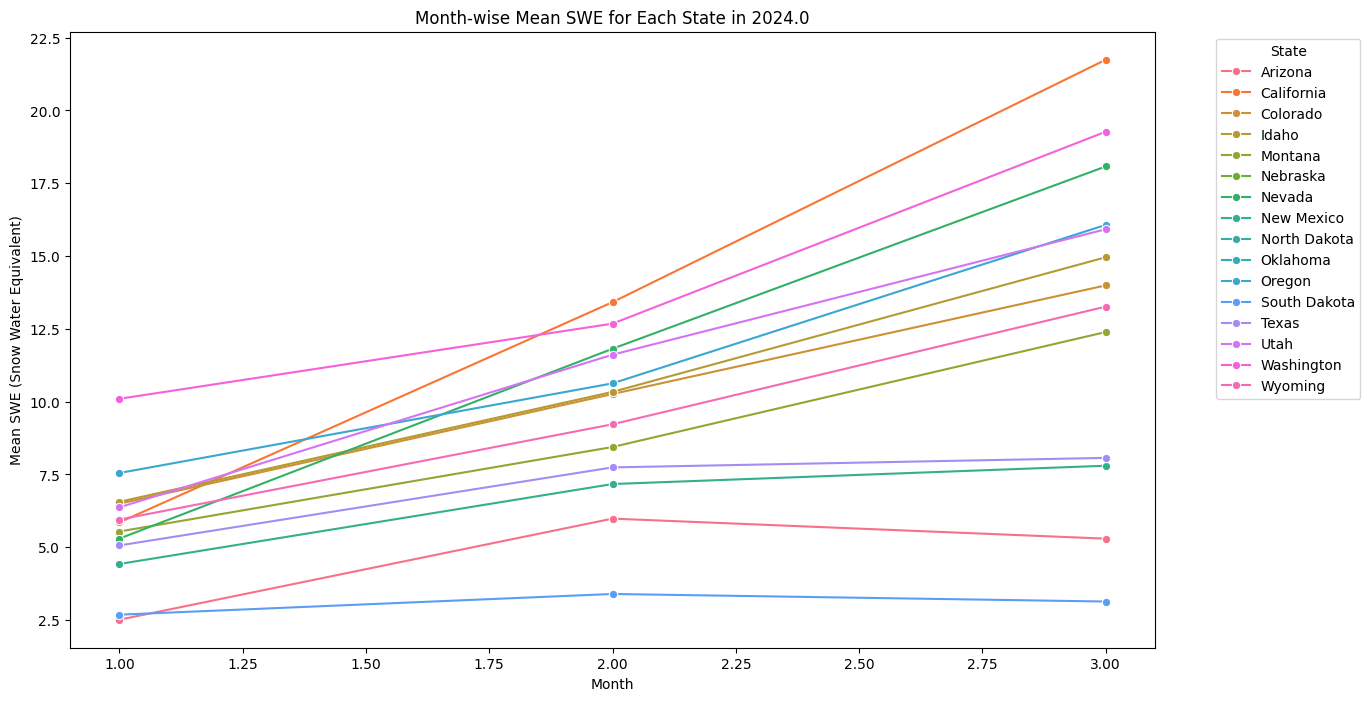

In [ ]:
all_states_monthly_mean_swe = pd.DataFrame()

for state, bounds in state_boundaries.items():
    state_monthly_mean_swe = calculate_monthly_mean_swe(state, bounds)
    all_states_monthly_mean_swe = pd.concat([all_states_monthly_mean_swe, state_monthly_mean_swe], ignore_index=True)

# Plot monthly mean SWE for each state for each year
years = all_states_monthly_mean_swe['year'].unique()

for year in years:
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=all_states_monthly_mean_swe[all_states_monthly_mean_swe['year'] == year],
                 x='month', y='swe_value', hue='state', marker='o')
    plt.title(f'Month-wise Mean SWE for Each State in {year}')
    plt.xlabel('Month')
    plt.ylabel('Mean SWE (Snow Water Equivalent)')
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

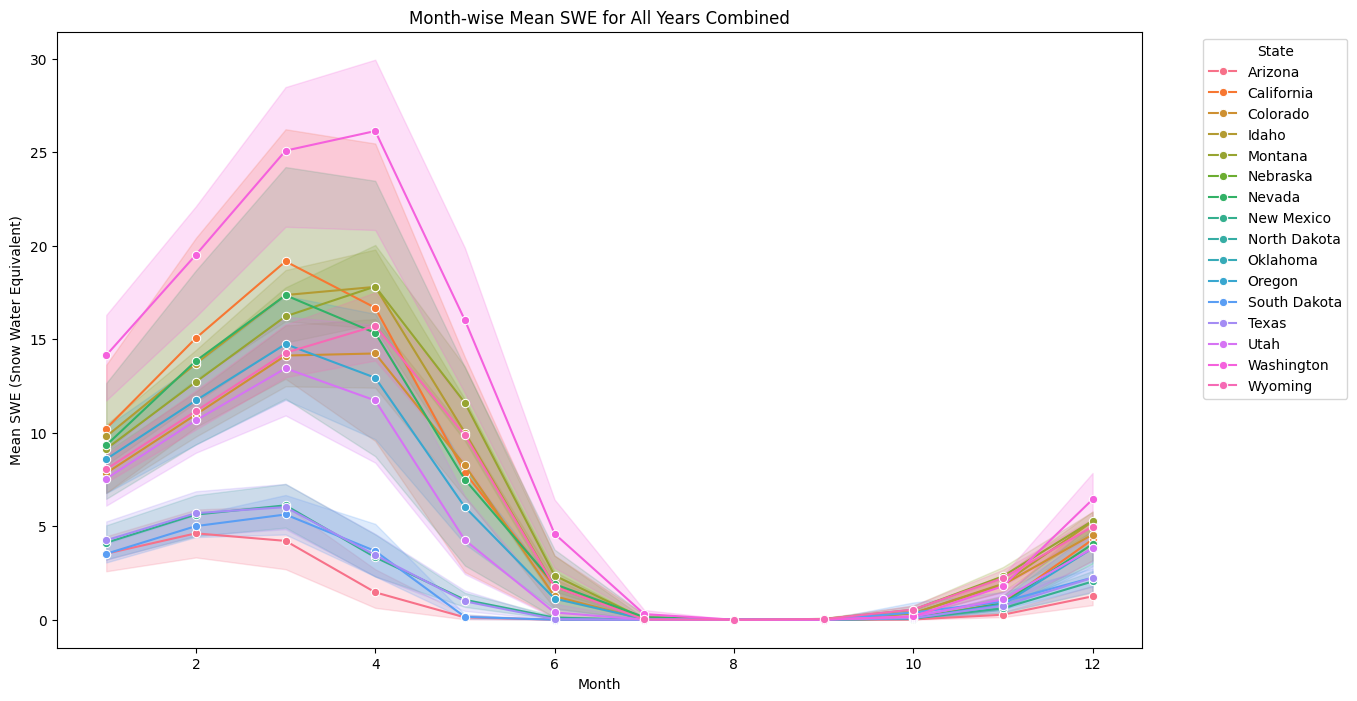

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=all_states_monthly_mean_swe, x='month', y='swe_value', hue='state', marker='o')
plt.title('Month-wise Mean SWE for All Years Combined')
plt.xlabel('Month')
plt.ylabel('Mean SWE (Snow Water Equivalent)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-20-b19cf0855fed>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=all_states_monthly_mean_swe, x='year', y='swe_value', hue='state', marker='o', ci=None)


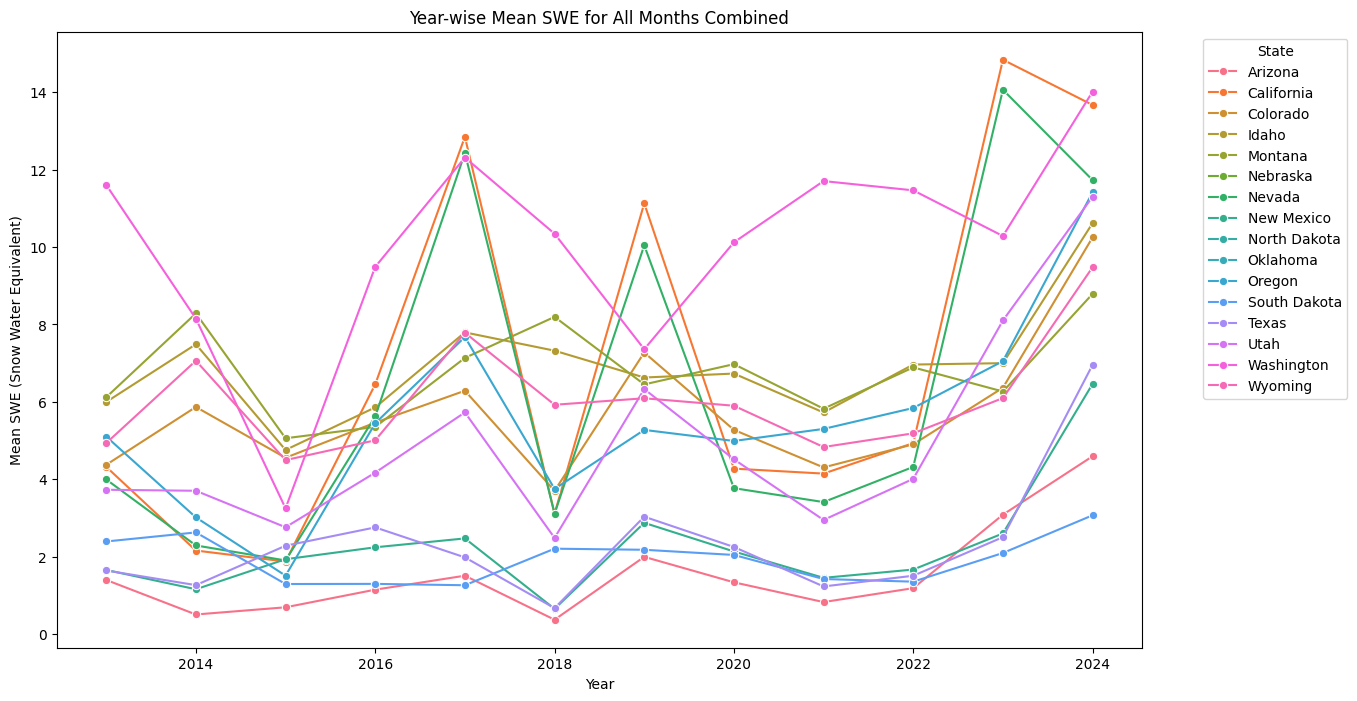

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=all_states_monthly_mean_swe, x='year', y='swe_value', hue='state', marker='o', ci=None)
plt.title('Year-wise Mean SWE for All Months Combined')
plt.xlabel('Year')
plt.ylabel('Mean SWE (Snow Water Equivalent)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()